## Project-1

#### About Dataset 
- The dataset provides the number of monthly sales of champagne from January 1964 to September 1972, or just under 10 years of data.
- The values are a count of millions of sales and there are 105 observations.
- The dataset is credited to Makridakis and Wheelwright, 1989.

The below cell contains all the questions and further down are the answers to those questions.

1) Load the dataset into your python environment. 
2) split the dataset into train (Jan 1964 - sep 1971) and valid (oct 1971 - Sep 1972)  
3) Use the stacked line chart (Discussed in the class) to visualize the dataset  
4) Visualize the monthly sales of champagne using box plot (aggreagate using monthly sales)  
5) Decompose the model into 
    - Trend
    - Seasonal
    - residual

### Building ARIMA model.
6) Build a SARIMA model using order (5, 1, 1) and seasonal_order = (1, 1, 0, 12) and evaluate the rmse on validation set.
```
Hint: sarimax.SARIMAX(x_train, trend='n', order=(5,1,1), seasonal_order=(1,1,0,12))
```
7) Build an Additive holtswinter method using seasonal component (12) and evaluate the rmse on validation set.
```
Hint: holtswinter.additive(list(x_train.values), 12, len(x_valid.values))
```

In [6]:
### Load the required libraries
import pandas as pd
import numpy as np
import datetime
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [7]:
def parser(x):
    return pd.datetime.strptime(x, '%Y-%m' )

## 1) Load the dataset into your python environment

In [23]:
data = pd.read_csv("data/perrin-freres-monthly-champagne.csv")
data["Month"] = pd.to_datetime(data["Month"])
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
Month    105 non-null datetime64[ns]
Sales    105 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB
None


,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


### 2) split the dataset into train (Jan 1964 - Sep 1971) and valid (Sep 1971 - Sep 1972)

In [24]:
x_train = data[data["Month"] <datetime.datetime(1971, 10, 1, 0, 0, 0)]
x_valid = data[data["Month"] >=datetime.datetime(1971, 10, 1, 0, 0, 0)]
print(x_train.shape, x_valid.shape)

(93, 2) (12, 2)


## 3) Use the stacked line chart (Discussed in the class) to visualize the dataset

In [25]:
ts = pd.DataFrame(x_train)
ts["year"] = ts["Month"].dt.year
ts["month"] = ts["Month"].dt.strftime('%b')
ts.head()

,Month,Sales,year,month
0,1964-01-01,2815,1964,Jan
1,1964-02-01,2672,1964,Feb
2,1964-03-01,2755,1964,Mar
3,1964-04-01,2721,1964,Apr
4,1964-05-01,2946,1964,May


In [26]:
def stacked_point_plot(x_column_name, y_column_name, hue, data, order_of_the_axis):
    return sns.pointplot(x=x_column_name, y=y_column_name, hue=hue, data=data, x_order=order_of_the_axis)

/Users/PrakashR/anaconda/envs/tondulkR/lib/python3.5/site-packages/seaborn/categorical.py:3062: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


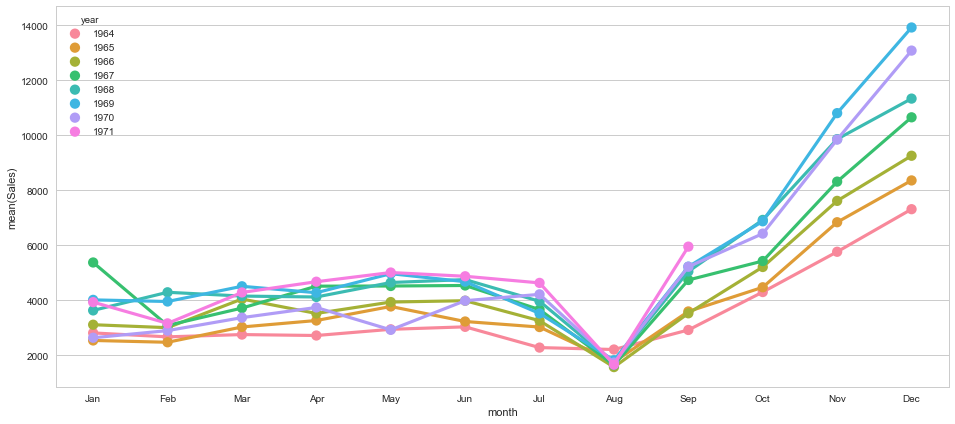

In [27]:
plt.figure(figsize=(16, 7))
stacked_point_plot("month", "Sales", "year", ts,['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'])

## 4)Visualize the monthly sales of champagne using box plot (aggreagate using monthly sales)

/Users/PrakashR/anaconda/envs/tondulkR/lib/python3.5/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


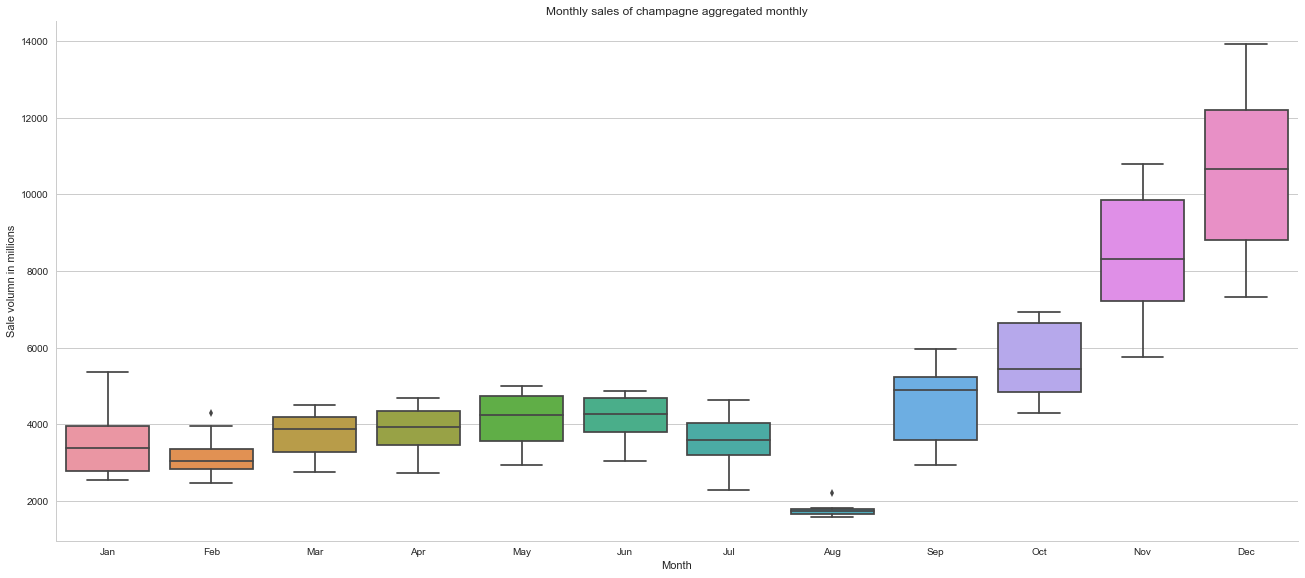

In [29]:
plt.figure(figsize=(16, 7))
sns.factorplot(x="month", y="Sales", data=ts, kind="box", x_order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec'], size=8, aspect=float(16/7))
plt.xlabel("Month")
plt.ylabel("Sale volumn in millions")
plt.title("Monthly sales of champagne aggregated monthly")

## 5) Decompose the time-series

## 6) Build SARIMA model

In [43]:
tss = pd.DataFrame(x_train["Sales"])
tss.column= ["Sales"]
tss.index = x_train["Month"].values

tss_valid = pd.DataFrame(x_valid["Sales"])
tss_valid.column= ["Sales"]
tss_valid.index = x_valid["Month"].values

tss.head()

,Sales
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [41]:
from statsmodels.tsa.statespace import sarimax
mod = sarimax.SARIMAX(tss,  order=(5,1,1), seasonal_order=(1,1,0,12))
results = mod.fit()

RMSE: 425.6265941253089


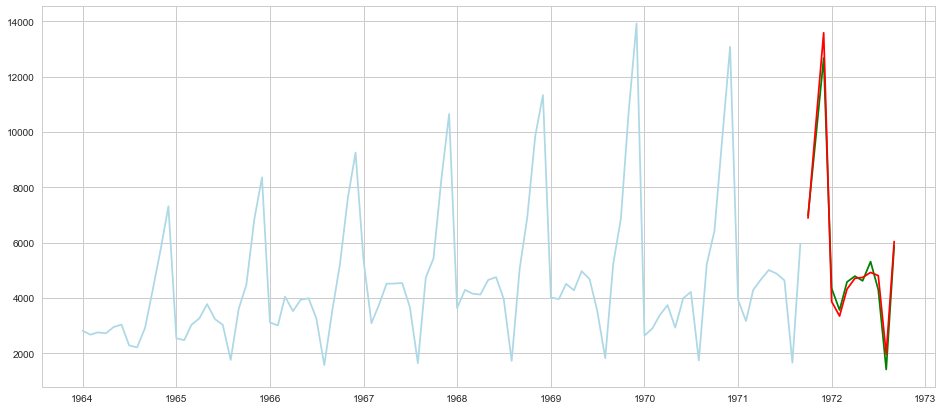

In [44]:

plt.figure(figsize=(16, 7))
plt.plot(tss.index, tss.Sales.values, color="lightblue")
plt.plot(tss_valid.index, tss_valid.Sales.values, color="green")

## Forecasting 
pred = pd.DataFrame(results.forecast(len(tss_valid)))
pred.columns = ["yhat"]
pred.index = tss_valid.index

## Converting from log to normal value
#pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(tss_valid.values, pred.values), 0.5)
print("RMSE:",measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()